In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy.stats import linregress
warnings.simplefilter("ignore")
plt.rcParams["figure.autolayout"] = True
plt.rcParams['axes.grid'] = True

In [2]:
def import_data(data, Patmo):
    data["datetime"] = pd.to_datetime(data["Datum & tijd"], dayfirst = True)
    data["time_since_start"] = ((data["datetime"] - data["datetime"].min()).dt.total_seconds())
    # starting at the maximum height level 
    index_max = data["Druk (cmH2O)"].idxmax()
    data = data.loc[index_max:]
    # adjusting for atmospheric pressure
    data["height"] = data["Druk (cmH2O)"] - Patmo
    # final arrays
    h = np.array(data["height"])/100
    t = np.array(data["time_since_start"])
    plt.plot(t, h) 
    plt.title("Observed head levels")
    plt.xlabel("time (s)")
    plt.ylabel("head (m)")
    return h,t

In [3]:
def inv_aug(r, h, t, code):
    k = []

    for i in range(len(h)-1):
        k_sat = 1.15 * r *( (np.log10(h[i] + 0.5*r) - np.log10(h[i+1] + 0.5*r))/(t[i+1] - t[i]))

        k.append(k_sat)
    ht = h + 0.5*r
    
    slope, intercept, r_value, p_value, std_err = linregress(t, np.log(ht))
    
    def model(x):
        return np.exp(intercept + slope * x)

    angle_rad_ccw = np.arctan(slope)
    angle_deg_ccw = np.degrees(angle_rad_ccw)
    
    print("angle", angle_deg_ccw)
    plt.semilogy(t, ht)
    plt.semilogy(t, model(t), '-', label='Fitted line')
    plt.xlabel("Time (s)")
    plt.ylabel("Ht (m)")
    K = 1.15 * r * -slope
    mean_ksat.append(K)
    code_list.append(code)
    return mean_ksat, code_list

In [4]:
mean_ksat = []
code_list  = []

Site4_Loc1_BF375_1

In [5]:
df = pd.read_csv('Site4_Loc1_BF375_1.csv', delimiter=r'\s+', encoding='utf-8', engine='python')
df = df.drop(df.columns[0], axis=1)
column_names = ['Datum & tijd', 'Druk (cmH2O)', "Temperatuur"]
df.columns = column_names
df

,Datum & tijd,Druk (cmH2O),Temperatuur
0,10:12:00.0,961.692,23.300
1,10:15:00.0,952.475,22.863
2,10:18:00.0,950.142,22.720
3,10:21:00.0,949.442,22.363


angle -0.210076241094632


([0.00021082596475959354], ['Site4_Loc1_BF375_1'])

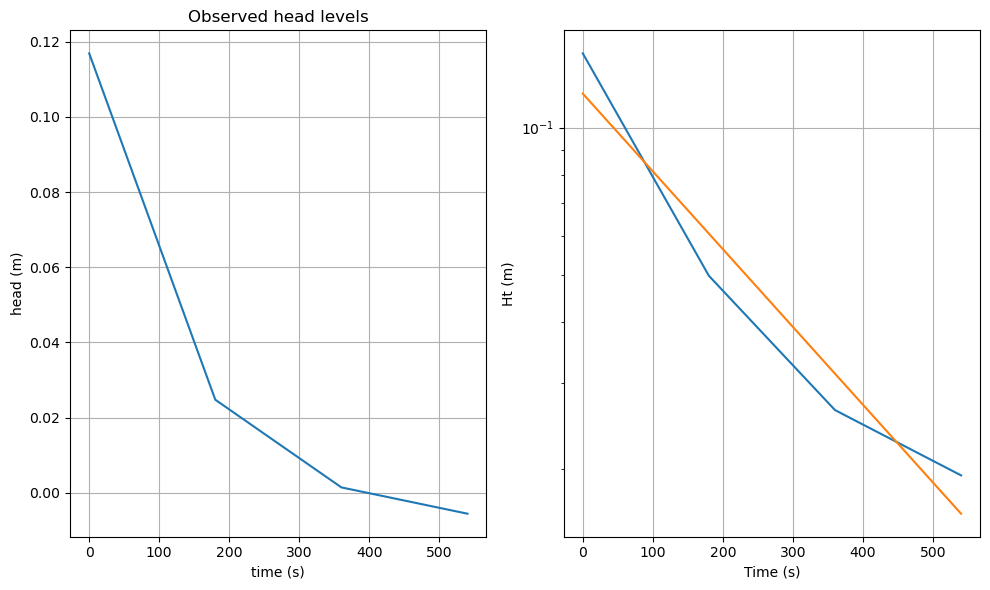

In [6]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
Patmo = 950
h, t = import_data(df, Patmo)
code = "Site4_Loc1_BF375_1"

plt.subplot(122)

r = 10/2/100 #radius of bore hole (m)
inv_aug(r, h, t, code)

Site4_Loc1_BF375_2

In [7]:
df = pd.read_csv('Site4_Loc1_BF375_2.csv', delimiter=r'\s+', encoding='utf-8', engine='python')
df = df.drop(df.columns[0], axis=1)
column_names = ['Datum & tijd', 'Druk (cmH2O)', "Temperatuur"]
df.columns = column_names
df

,Datum & tijd,Druk (cmH2O),Temperatuur
0,10:27:00.0,974.525,22.567
1,10:30:00.0,969.567,22.620
2,10:33:00.0,966.300,22.643
3,10:36:00.0,963.383,22.673
4,10:39:00.0,957.083,22.673
5,10:42:00.0,955.742,22.697
6,10:45:00.0,954.167,22.737
7,10:48:00.0,953.292,22.753
8,10:51:00.0,952.242,22.753
9,10:54:00.0,951.308,22.753


angle -0.07913662207694286


([0.00021082596475959354, 7.94187408159181e-05],
 ['Site4_Loc1_BF375_1', 'Site4_Loc1_BF375_2'])

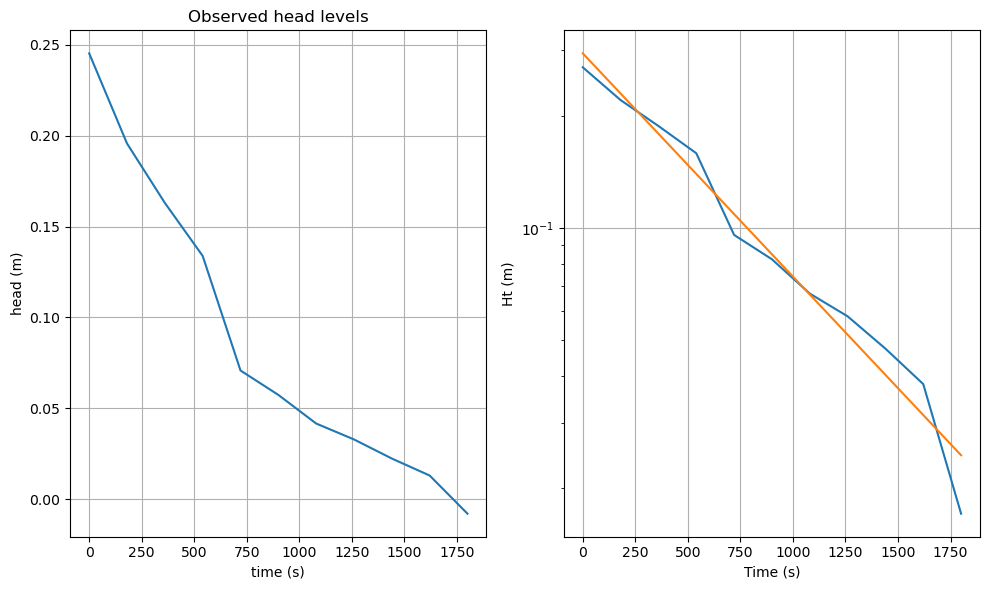

In [8]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
Patmo = 950
h, t = import_data(df, Patmo)
code = "Site4_Loc1_BF375_2"

plt.subplot(122)

r = 10/2/100 #radius of bore hole (m)
inv_aug(r, h, t, code)

Site4_Loc1_DF002

In [9]:
df = pd.read_csv('Site4_Loc1_DF002.txt', delimiter = "      ",  encoding='ISO-8859-1', skiprows = 53, skipfooter = 1)
column_names = ['Datum & tijd', 'Druk (cmH2O)', "Temperatuur"]
df.columns = column_names
df

,Datum & tijd,Druk (cmH2O),Temperatuur
0,2024/09/11 09:00:15.0,951.775,21.960
1,2024/09/11 09:00:30.0,951.892,21.967
2,2024/09/11 09:00:45.0,951.892,21.960
3,2024/09/11 09:01:00.0,951.775,21.943
4,2024/09/11 09:01:15.0,952.067,21.960
...,...,...,...
2352,2024/09/11 18:48:15.0,955.158,26.130
2353,2024/09/11 18:48:30.0,955.625,26.297
2354,2024/09/11 18:48:45.0,955.858,26.500
2355,2024/09/11 18:49:00.0,955.858,26.717


angle -0.004141725241364901


([0.00021082596475959354, 7.94187408159181e-05, 4.156487682289258e-06],
 ['Site4_Loc1_BF375_1', 'Site4_Loc1_BF375_2', 'Site4_Loc1_DF002_1'])

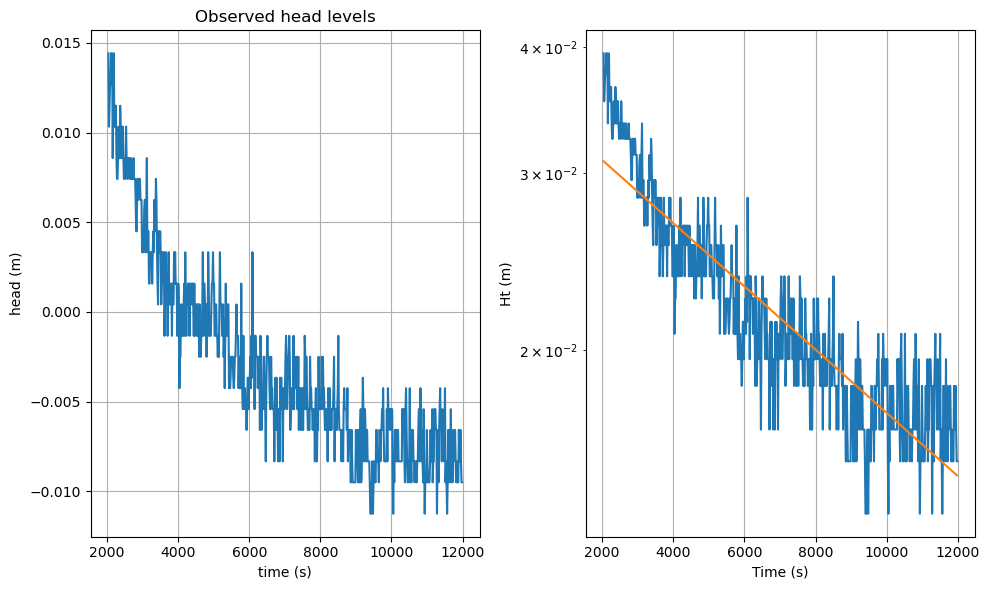

In [10]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
Patmo = 955

h, t = import_data(df[1000:1800], Patmo)
code = "Site4_Loc1_DF002_1"

plt.subplot(122)

r = 10/2/100 #radius of bore hole (m)
inv_aug(r, h, t, code)

Site1_Loc4_AL116_1

In [11]:
df = pd.read_csv('Site1_Loc4_AL116_1.csv', delimiter = "      ",  encoding='ISO-8859-1')
column_names = ['Datum & tijd', 'Druk (cmH2O)', "Temperatuur"]
df.columns = column_names

angle -0.5234499176102144


([0.00021082596475959354,
  7.94187408159181e-05,
  4.156487682289258e-06,
  0.0005253302762321572],
 ['Site4_Loc1_BF375_1',
  'Site4_Loc1_BF375_2',
  'Site4_Loc1_DF002_1',
  'Site1_Loc4_AL116_1'])

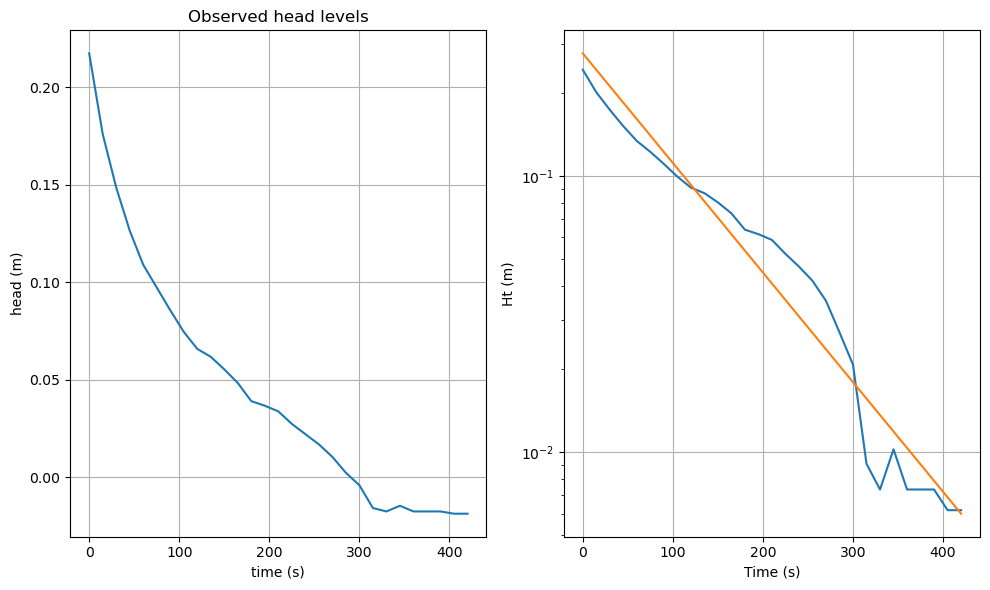

In [12]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
Patmo = 955

h, t = import_data(df, Patmo)
code = "Site1_Loc4_AL116_1"

plt.subplot(122)

r = 10/2/100 #radius of bore hole (m)
inv_aug(r, h, t, code)

Site1_Loc4_AL116_2

In [13]:
df = pd.read_csv('Site1_Loc4_AL116_2.csv', delimiter = "      ",  encoding='ISO-8859-1')
column_names = ['Datum & tijd', 'Druk (cmH2O)', "Temperatuur"]
df.columns = column_names

angle -0.16211232405304435


([0.00021082596475959354,
  7.94187408159181e-05,
  4.156487682289258e-06,
  0.0005253302762321572,
  0.00016269057837355112],
 ['Site4_Loc1_BF375_1',
  'Site4_Loc1_BF375_2',
  'Site4_Loc1_DF002_1',
  'Site1_Loc4_AL116_1',
  'Site1_Loc4_AL116_2'])

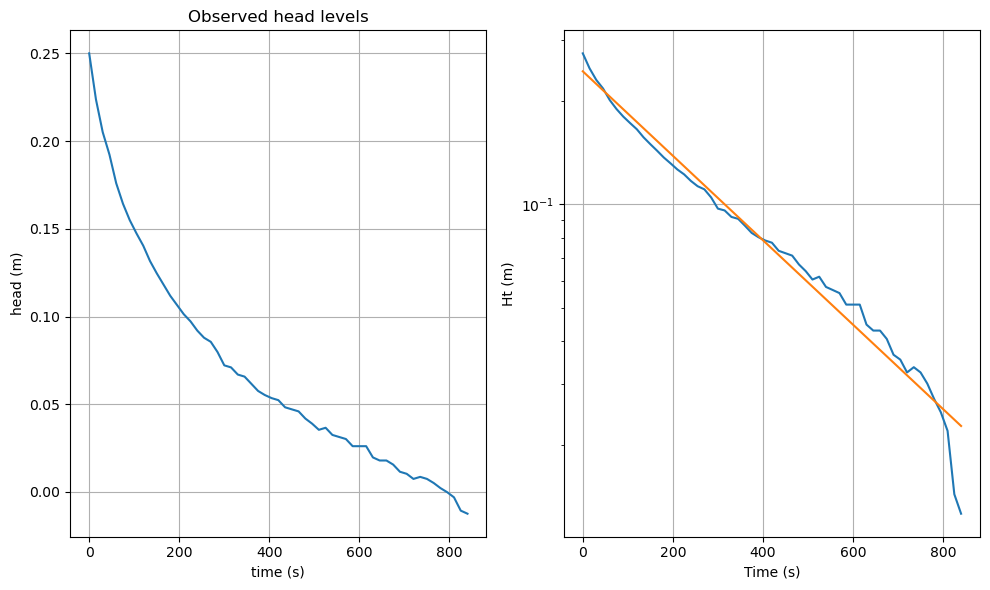

In [14]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
Patmo = 955

h, t = import_data(df, Patmo)
code = "Site1_Loc4_AL116_2"

plt.subplot(122)

r = 10/2/100 #radius of bore hole (m)
inv_aug(r, h, t, code)

Site1_Loc4_DF002_2

In [15]:
df = pd.read_csv('Site1_Loc4_DF002_2.csv', delimiter = "      ",  encoding='ISO-8859-1')
column_names = ['Datum & tijd', 'Druk (cmH2O)', "Temperatuur"]
df.columns = column_names

angle -0.6469521630412463


([0.00021082596475959354,
  7.94187408159181e-05,
  4.156487682289258e-06,
  0.0005253302762321572,
  0.00016269057837355112,
  0.0006492857016790994],
 ['Site4_Loc1_BF375_1',
  'Site4_Loc1_BF375_2',
  'Site4_Loc1_DF002_1',
  'Site1_Loc4_AL116_1',
  'Site1_Loc4_AL116_2',
  'Site1_Loc4_DF200_2'])

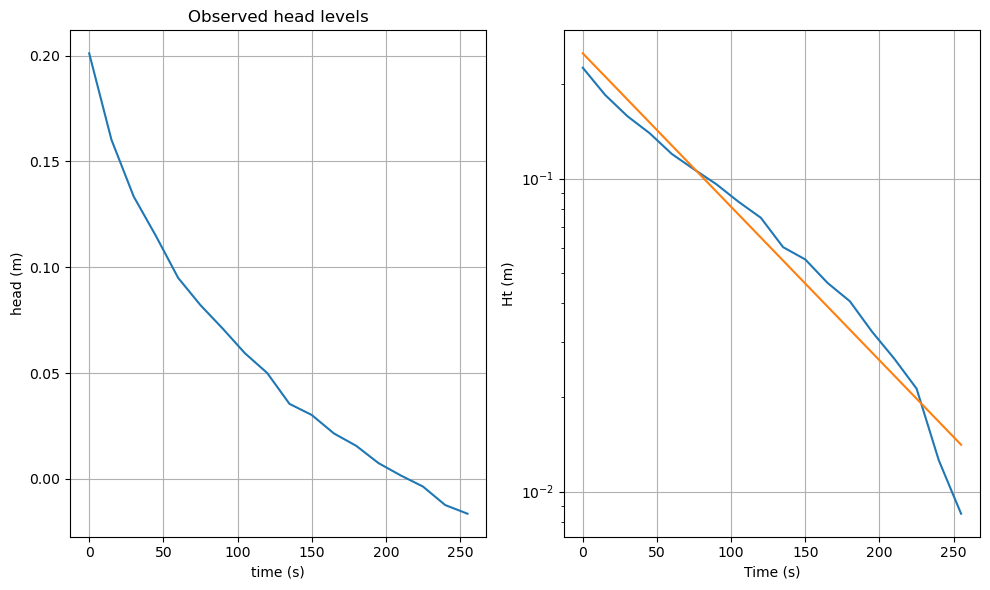

In [16]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
Patmo = 955

h, t = import_data(df, Patmo)
code = "Site1_Loc4_DF200_2"

plt.subplot(122)

r = 10/2/100 #radius of bore hole (m)
inv_aug(r, h, t, code)

Site2_Loc1_AL116_1

In [17]:
df = pd.read_csv('Site2_loc1_AL116_1.csv', delimiter = "      ",  encoding='ISO-8859-1')
column_names = ['Datum & tijd', 'Druk (cmH2O)', "Temperatuur"]
df.columns = column_names

angle -0.15825316362238512


([0.00021082596475959354,
  7.94187408159181e-05,
  4.156487682289258e-06,
  0.0005253302762321572,
  0.00016269057837355112,
  0.0006492857016790994,
  0.00015881763238813855],
 ['Site4_Loc1_BF375_1',
  'Site4_Loc1_BF375_2',
  'Site4_Loc1_DF002_1',
  'Site1_Loc4_AL116_1',
  'Site1_Loc4_AL116_2',
  'Site1_Loc4_DF200_2',
  'Site2_Loc1_AL116_1'])

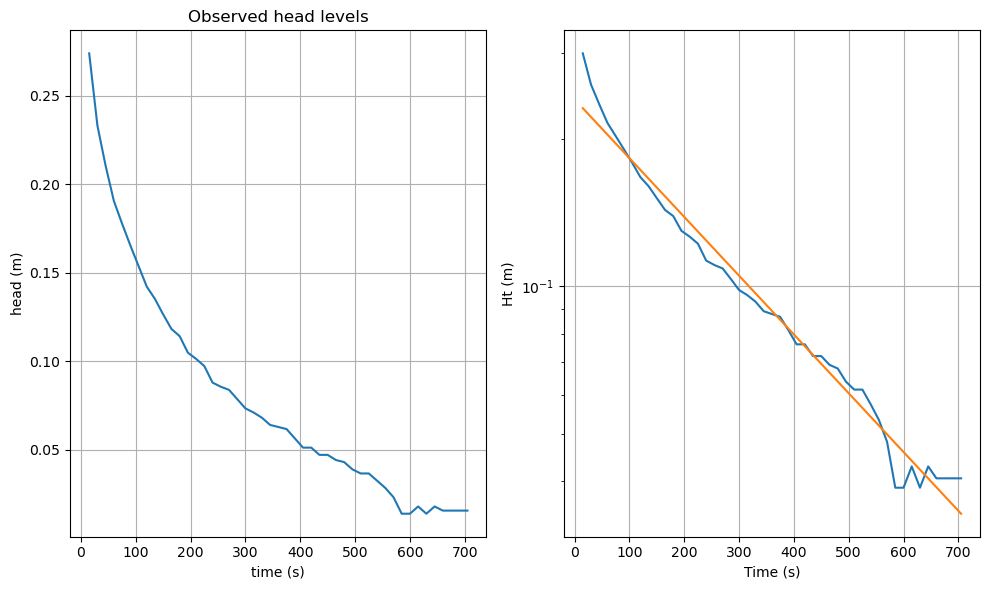

In [18]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
Patmo = 955

h, t = import_data(df, Patmo)
code = "Site2_Loc1_AL116_1"

plt.subplot(122)

r = 10/2/100 #radius of bore hole (m)
inv_aug(r, h, t, code)

Site2_loc1_AL116_2

In [19]:
df = pd.read_csv('Site2_loc1_AL116_2.csv', delimiter = "      ",  encoding='ISO-8859-1')
column_names = ['Datum & tijd', 'Druk (cmH2O)', "Temperatuur"]
df.columns = column_names

angle -0.08043220446050264


([0.00021082596475959354,
  7.94187408159181e-05,
  4.156487682289258e-06,
  0.0005253302762321572,
  0.00016269057837355112,
  0.0006492857016790994,
  0.00015881763238813855,
  8.071894359076811e-05],
 ['Site4_Loc1_BF375_1',
  'Site4_Loc1_BF375_2',
  'Site4_Loc1_DF002_1',
  'Site1_Loc4_AL116_1',
  'Site1_Loc4_AL116_2',
  'Site1_Loc4_DF200_2',
  'Site2_Loc1_AL116_1',
  'Site2_Loc1_AL116_2'])

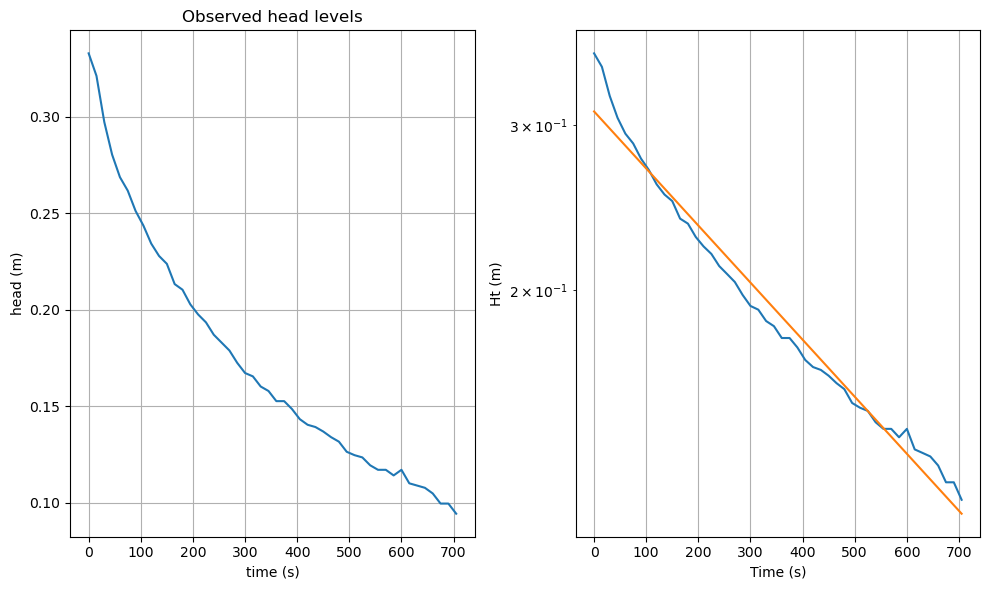

In [20]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
Patmo = 955

h, t = import_data(df[:-5], Patmo)
code = "Site2_Loc1_AL116_2"

plt.subplot(122)

r = 10/2/100 #radius of bore hole (m)
inv_aug(r, h, t, code)

Site2_loc1_AL116_3

In [21]:
df = pd.read_csv('Site2_loc1_AL116_3.csv', delimiter = "      ",  encoding='ISO-8859-1')
column_names = ['Datum & tijd', 'Druk (cmH2O)', "Temperatuur"]
df.columns = column_names

angle -0.06767213876416037


([0.00021082596475959354,
  7.94187408159181e-05,
  4.156487682289258e-06,
  0.0005253302762321572,
  0.00016269057837355112,
  0.0006492857016790994,
  0.00015881763238813855,
  8.071894359076811e-05,
  6.79133754945591e-05],
 ['Site4_Loc1_BF375_1',
  'Site4_Loc1_BF375_2',
  'Site4_Loc1_DF002_1',
  'Site1_Loc4_AL116_1',
  'Site1_Loc4_AL116_2',
  'Site1_Loc4_DF200_2',
  'Site2_Loc1_AL116_1',
  'Site2_Loc1_AL116_2',
  'Site2_Loc1_AL116_3'])

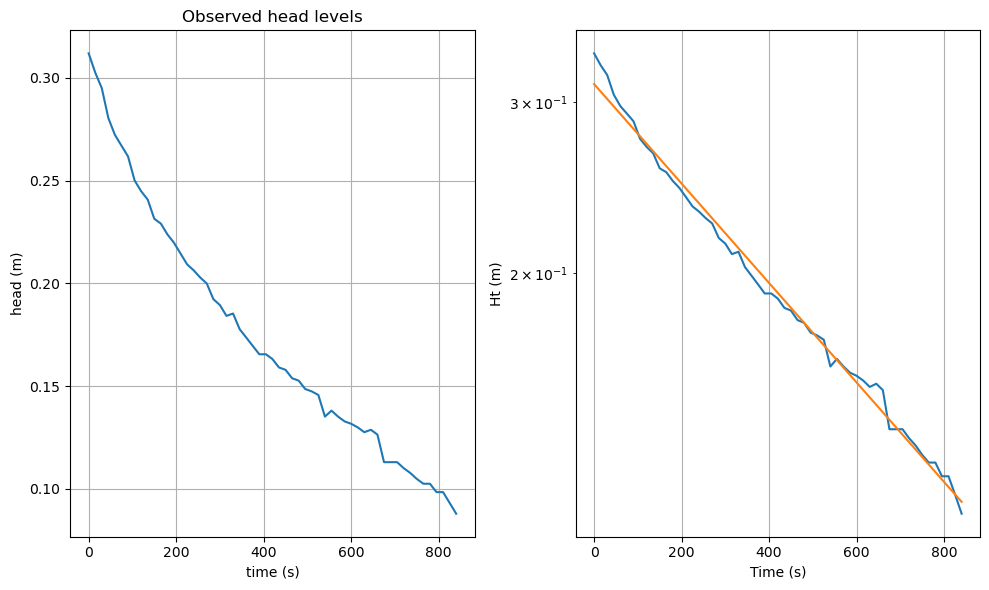

In [22]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
Patmo = 955

h, t = import_data(df[:-5], Patmo)
code = "Site2_Loc1_AL116_3"

plt.subplot(122)

r = 10/2/100 #radius of bore hole (m)
inv_aug(r, h, t, code)

Site2_Loc1_DF002_1

In [23]:
df = pd.read_csv('Site2_loc1_DF002_1.csv', delimiter = "      ",  encoding='ISO-8859-1')
column_names = ['Datum & tijd', 'Druk (cmH2O)', "Temperatuur"]
df.columns = column_names

angle -0.21991908982440586


([0.00021082596475959354,
  7.94187408159181e-05,
  4.156487682289258e-06,
  0.0005253302762321572,
  0.00016269057837355112,
  0.0006492857016790994,
  0.00015881763238813855,
  8.071894359076811e-05,
  6.79133754945591e-05,
  0.00022070403566408213],
 ['Site4_Loc1_BF375_1',
  'Site4_Loc1_BF375_2',
  'Site4_Loc1_DF002_1',
  'Site1_Loc4_AL116_1',
  'Site1_Loc4_AL116_2',
  'Site1_Loc4_DF200_2',
  'Site2_Loc1_AL116_1',
  'Site2_Loc1_AL116_2',
  'Site2_Loc1_AL116_3',
  'Site2_Loc1_DF002_1'])

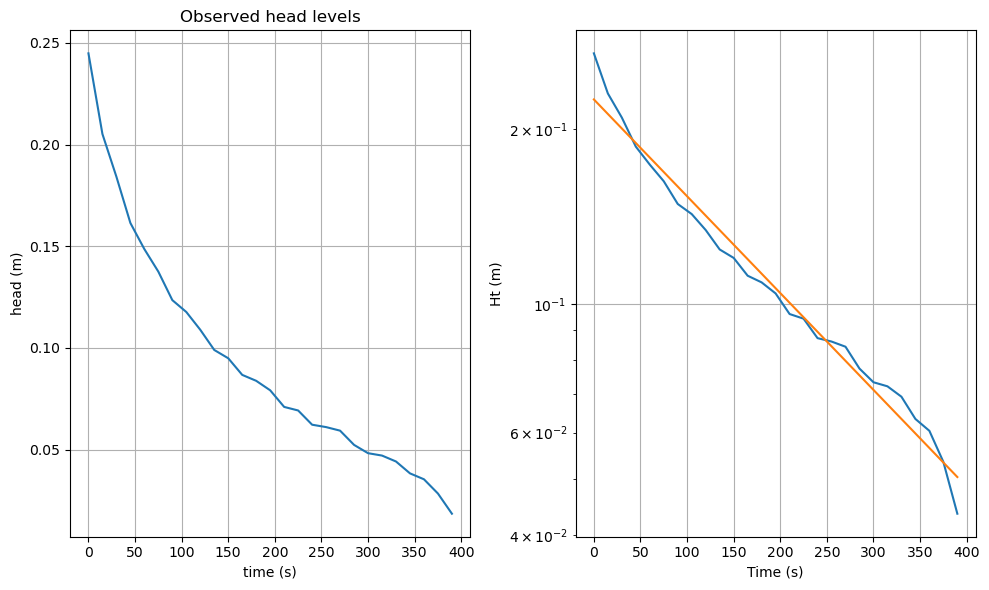

In [24]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
Patmo = 955

h, t = import_data(df[:-5], Patmo)
code = "Site2_Loc1_DF002_1"

plt.subplot(122)

r = 10/2/100 #radius of bore hole (m)
inv_aug(r, h, t, code)

Site2_Loc1_DF002_2

In [25]:
df = pd.read_csv('Site2_loc1_DF002_2.csv', delimiter = "      ",  encoding='ISO-8859-1')
column_names = ['Datum & tijd', 'Druk (cmH2O)', "Temperatuur"]
df.columns = column_names

angle -0.1095887456259832


([0.00021082596475959354,
  7.94187408159181e-05,
  4.156487682289258e-06,
  0.0005253302762321572,
  0.00016269057837355112,
  0.0006492857016790994,
  0.00015881763238813855,
  8.071894359076811e-05,
  6.79133754945591e-05,
  0.00022070403566408213,
  0.00010997948908742785],
 ['Site4_Loc1_BF375_1',
  'Site4_Loc1_BF375_2',
  'Site4_Loc1_DF002_1',
  'Site1_Loc4_AL116_1',
  'Site1_Loc4_AL116_2',
  'Site1_Loc4_DF200_2',
  'Site2_Loc1_AL116_1',
  'Site2_Loc1_AL116_2',
  'Site2_Loc1_AL116_3',
  'Site2_Loc1_DF002_1',
  'Site2_Loc1_DF002_2'])

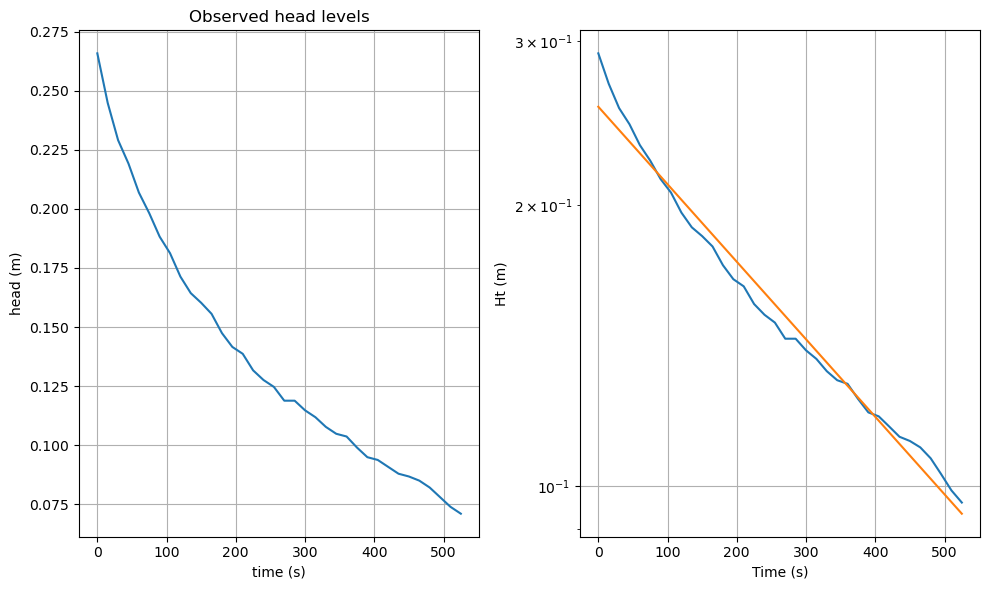

In [26]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
Patmo = 955

h, t = import_data(df[:-10], Patmo)
code = "Site2_Loc1_DF002_2"

plt.subplot(122)

r = 10/2/100 #radius of bore hole (m)
inv_aug(r, h, t, code)

Site2_Loc1_DF002_3

In [27]:
df = pd.read_csv('Site2_loc1_DF002_3.csv', delimiter = "      ",  encoding='ISO-8859-1')
column_names = ['Datum & tijd', 'Druk (cmH2O)', "Temperatuur"]
df.columns = column_names

angle -0.05842282322502385


([0.00021082596475959354,
  7.94187408159181e-05,
  4.156487682289258e-06,
  0.0005253302762321572,
  0.00016269057837355112,
  0.0006492857016790994,
  0.00015881763238813855,
  8.071894359076811e-05,
  6.79133754945591e-05,
  0.00022070403566408213,
  0.00010997948908742785,
  5.863108117639902e-05],
 ['Site4_Loc1_BF375_1',
  'Site4_Loc1_BF375_2',
  'Site4_Loc1_DF002_1',
  'Site1_Loc4_AL116_1',
  'Site1_Loc4_AL116_2',
  'Site1_Loc4_DF200_2',
  'Site2_Loc1_AL116_1',
  'Site2_Loc1_AL116_2',
  'Site2_Loc1_AL116_3',
  'Site2_Loc1_DF002_1',
  'Site2_Loc1_DF002_2',
  'Site2_Loc1_DF002_3'])

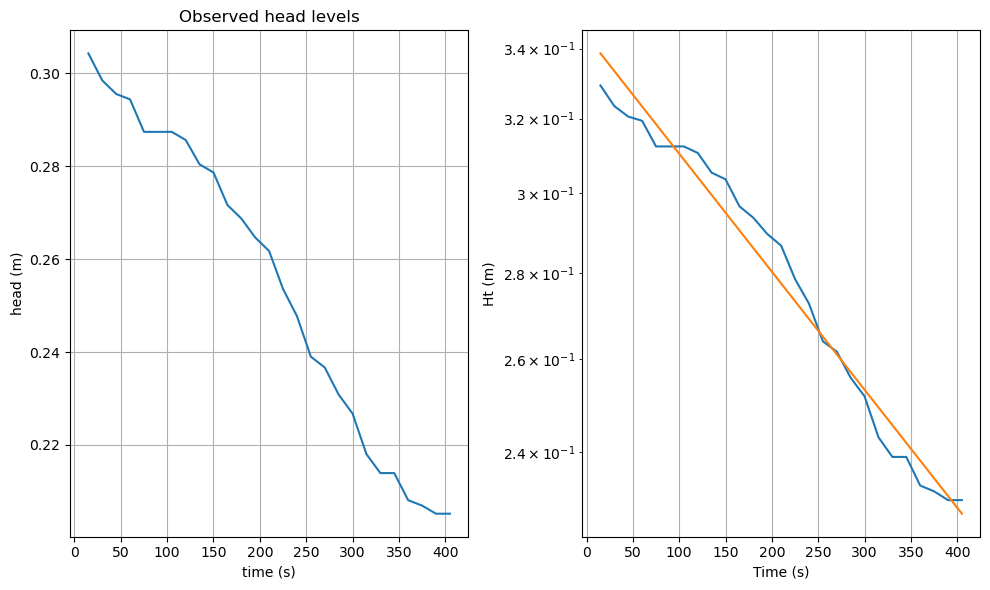

In [28]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
Patmo = 955

h, t = import_data(df[:-50], Patmo)
code = "Site2_Loc1_DF002_3"

plt.subplot(122)

r = 10/2/100 #radius of bore hole (m)
inv_aug(r, h, t, code)

Site2_Loc6_AL116_1

In [29]:
df = pd.read_csv('Site2_loc6_AL116_1.csv', delimiter = "      ",  encoding='ISO-8859-1')
column_names = ['Datum & tijd', 'Druk (cmH2O)', "Temperatuur"]
df.columns = column_names

angle -0.7516512809248626


([0.00021082596475959354,
  7.94187408159181e-05,
  4.156487682289258e-06,
  0.0005253302762321572,
  0.00016269057837355112,
  0.0006492857016790994,
  0.00015881763238813855,
  8.071894359076811e-05,
  6.79133754945591e-05,
  0.00022070403566408213,
  0.00010997948908742785,
  5.863108117639902e-05,
  0.0007543736836055774],
 ['Site4_Loc1_BF375_1',
  'Site4_Loc1_BF375_2',
  'Site4_Loc1_DF002_1',
  'Site1_Loc4_AL116_1',
  'Site1_Loc4_AL116_2',
  'Site1_Loc4_DF200_2',
  'Site2_Loc1_AL116_1',
  'Site2_Loc1_AL116_2',
  'Site2_Loc1_AL116_3',
  'Site2_Loc1_DF002_1',
  'Site2_Loc1_DF002_2',
  'Site2_Loc1_DF002_3',
  'Site2_Loc6_AL116_1'])

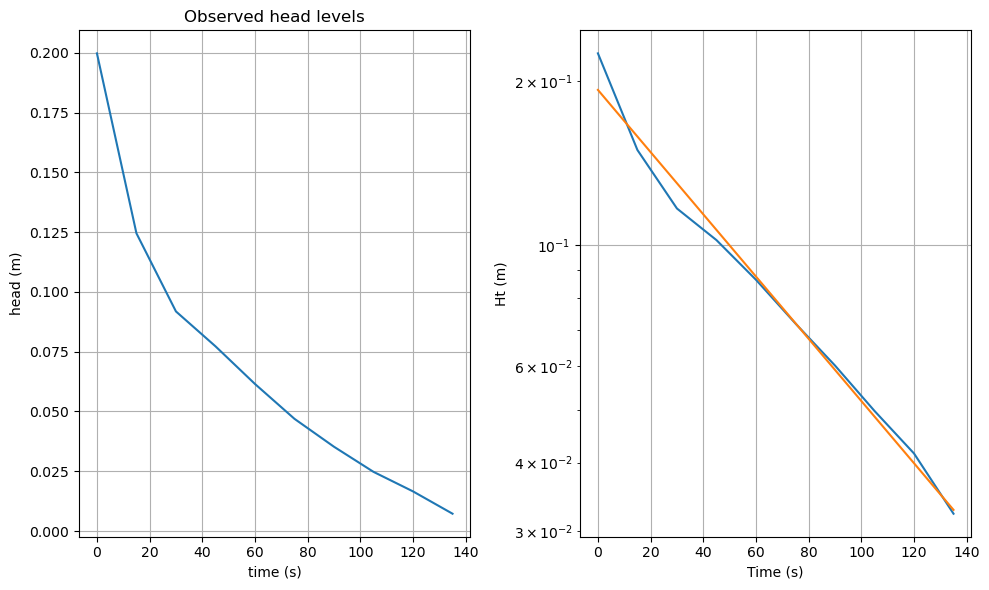

In [30]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
Patmo = 950

h, t = import_data(df, Patmo)
code = "Site2_Loc6_AL116_1"

plt.subplot(122)

r = 10/2/100 #radius of bore hole (m)
inv_aug(r, h, t, code)

Site2_loc6_AL116_2

In [31]:
df = pd.read_csv('Site2_loc6_AL116_2.csv', delimiter = "      ",  encoding='ISO-8859-1')
column_names = ['Datum & tijd', 'Druk (cmH2O)', "Temperatuur"]
df.columns = column_names

angle -0.3763910635923234


([0.00021082596475959354,
  7.94187408159181e-05,
  4.156487682289258e-06,
  0.0005253302762321572,
  0.00016269057837355112,
  0.0006492857016790994,
  0.00015881763238813855,
  8.071894359076811e-05,
  6.79133754945591e-05,
  0.00022070403566408213,
  0.00010997948908742785,
  5.863108117639902e-05,
  0.0007543736836055774,
  0.0003777380755548871],
 ['Site4_Loc1_BF375_1',
  'Site4_Loc1_BF375_2',
  'Site4_Loc1_DF002_1',
  'Site1_Loc4_AL116_1',
  'Site1_Loc4_AL116_2',
  'Site1_Loc4_DF200_2',
  'Site2_Loc1_AL116_1',
  'Site2_Loc1_AL116_2',
  'Site2_Loc1_AL116_3',
  'Site2_Loc1_DF002_1',
  'Site2_Loc1_DF002_2',
  'Site2_Loc1_DF002_3',
  'Site2_Loc6_AL116_1',
  'Site2_Loc6_AL116_2'])

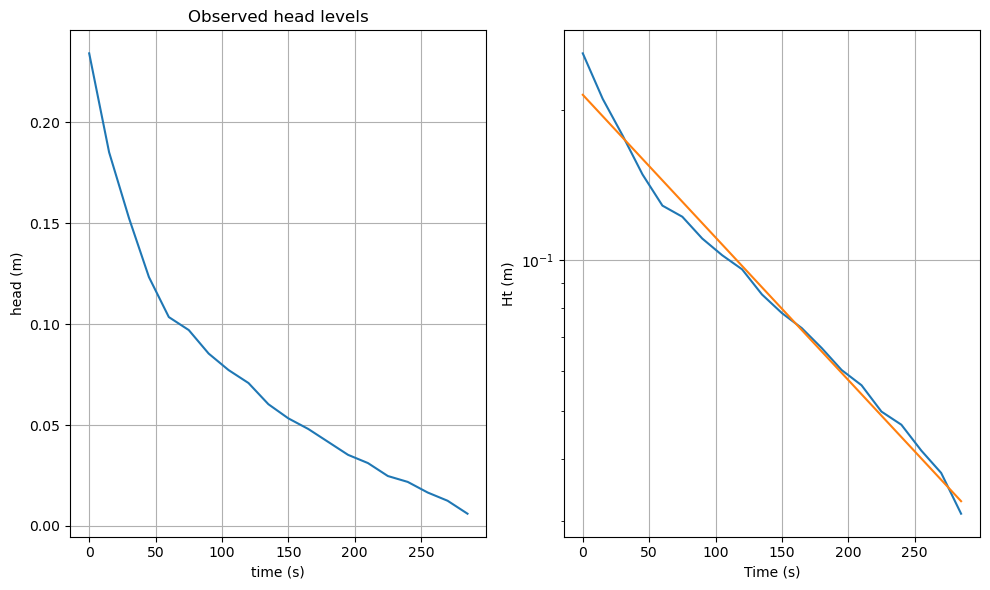

In [32]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
Patmo = 950

h, t = import_data(df, Patmo)
code = "Site2_Loc6_AL116_2"

plt.subplot(122)

r = 10/2/100 #radius of bore hole (m)
inv_aug(r, h, t, code)

Site2_Loc6_AL116_3

In [33]:
df = pd.read_csv('Site2_loc6_AL116_3.csv', delimiter = "      ",  encoding='ISO-8859-1')
column_names = ['Datum & tijd', 'Druk (cmH2O)', "Temperatuur"]
df.columns = column_names

angle -0.3649199557526738


([0.00021082596475959354,
  7.94187408159181e-05,
  4.156487682289258e-06,
  0.0005253302762321572,
  0.00016269057837355112,
  0.0006492857016790994,
  0.00015881763238813855,
  8.071894359076811e-05,
  6.79133754945591e-05,
  0.00022070403566408213,
  0.00010997948908742785,
  5.863108117639902e-05,
  0.0007543736836055774,
  0.0003777380755548871,
  0.0003662255991882395],
 ['Site4_Loc1_BF375_1',
  'Site4_Loc1_BF375_2',
  'Site4_Loc1_DF002_1',
  'Site1_Loc4_AL116_1',
  'Site1_Loc4_AL116_2',
  'Site1_Loc4_DF200_2',
  'Site2_Loc1_AL116_1',
  'Site2_Loc1_AL116_2',
  'Site2_Loc1_AL116_3',
  'Site2_Loc1_DF002_1',
  'Site2_Loc1_DF002_2',
  'Site2_Loc1_DF002_3',
  'Site2_Loc6_AL116_1',
  'Site2_Loc6_AL116_2',
  'Site2_Loc6_AL116_3'])

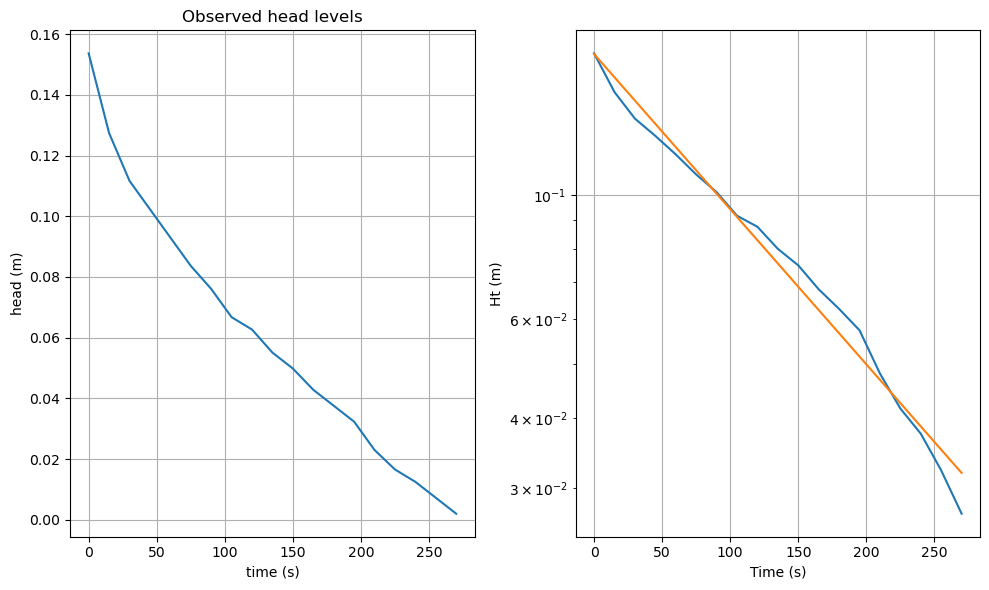

In [34]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
Patmo = 950

h, t = import_data(df, Patmo)
code = "Site2_Loc6_AL116_3"

plt.subplot(122)

r = 10/2/100 #radius of bore hole (m)
inv_aug(r, h, t, code)

Site2_loc6_DF002_1

In [35]:
df = pd.read_csv('Site2_loc6_DF002_1.csv', delimiter = "      ",  encoding='ISO-8859-1')
column_names = ['Datum & tijd', 'Druk (cmH2O)', "Temperatuur"]
df.columns = column_names

angle -0.2658979638787863


([0.00021082596475959354,
  7.94187408159181e-05,
  4.156487682289258e-06,
  0.0005253302762321572,
  0.00016269057837355112,
  0.0006492857016790994,
  0.00015881763238813855,
  8.071894359076811e-05,
  6.79133754945591e-05,
  0.00022070403566408213,
  0.00010997948908742785,
  5.863108117639902e-05,
  0.0007543736836055774,
  0.0003777380755548871,
  0.0003662255991882395,
  0.0002668476249818098],
 ['Site4_Loc1_BF375_1',
  'Site4_Loc1_BF375_2',
  'Site4_Loc1_DF002_1',
  'Site1_Loc4_AL116_1',
  'Site1_Loc4_AL116_2',
  'Site1_Loc4_DF200_2',
  'Site2_Loc1_AL116_1',
  'Site2_Loc1_AL116_2',
  'Site2_Loc1_AL116_3',
  'Site2_Loc1_DF002_1',
  'Site2_Loc1_DF002_2',
  'Site2_Loc1_DF002_3',
  'Site2_Loc6_AL116_1',
  'Site2_Loc6_AL116_2',
  'Site2_Loc6_AL116_3',
  'Site2_Loc6_DF002_1'])

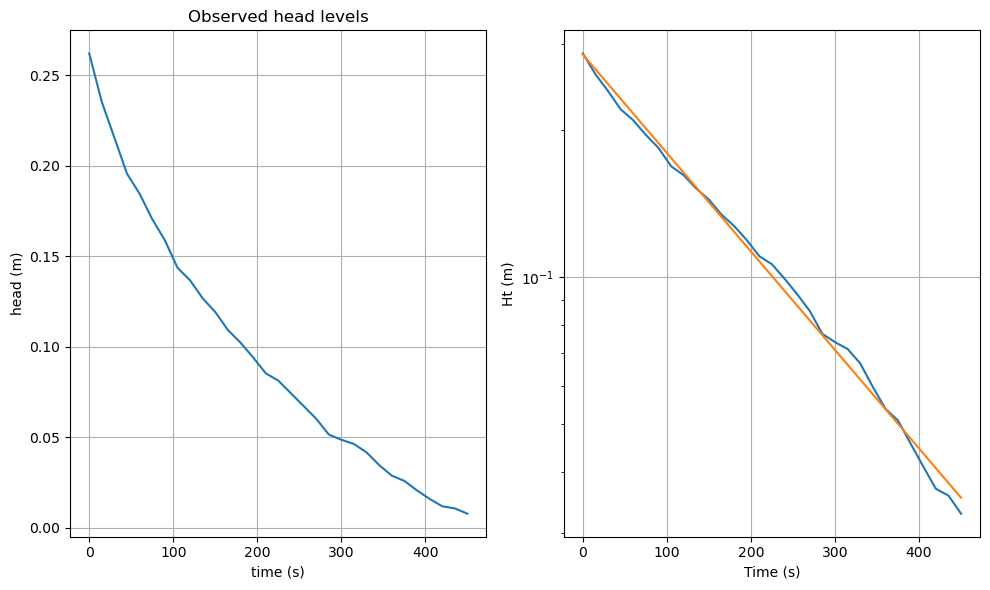

In [36]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
Patmo = 950

h, t = import_data(df, Patmo)
code = "Site2_Loc6_DF002_1"

plt.subplot(122)

r = 10/2/100 #radius of bore hole (m)
inv_aug(r, h, t, code)

Site2_Loc6_DF002_2

In [37]:
df = pd.read_csv('Site2_loc6_DF002_2.csv', delimiter = "      ",  encoding='ISO-8859-1')
column_names = ['Datum & tijd', 'Druk (cmH2O)', "Temperatuur"]
df.columns = column_names

angle -0.4025770372772023


([0.00021082596475959354,
  7.94187408159181e-05,
  4.156487682289258e-06,
  0.0005253302762321572,
  0.00016269057837355112,
  0.0006492857016790994,
  0.00015881763238813855,
  8.071894359076811e-05,
  6.79133754945591e-05,
  0.00022070403566408213,
  0.00010997948908742785,
  5.863108117639902e-05,
  0.0007543736836055774,
  0.0003777380755548871,
  0.0003662255991882395,
  0.0002668476249818098,
  0.0004040185992833251],
 ['Site4_Loc1_BF375_1',
  'Site4_Loc1_BF375_2',
  'Site4_Loc1_DF002_1',
  'Site1_Loc4_AL116_1',
  'Site1_Loc4_AL116_2',
  'Site1_Loc4_DF200_2',
  'Site2_Loc1_AL116_1',
  'Site2_Loc1_AL116_2',
  'Site2_Loc1_AL116_3',
  'Site2_Loc1_DF002_1',
  'Site2_Loc1_DF002_2',
  'Site2_Loc1_DF002_3',
  'Site2_Loc6_AL116_1',
  'Site2_Loc6_AL116_2',
  'Site2_Loc6_AL116_3',
  'Site2_Loc6_DF002_1',
  'Site2_Loc6_DF002_2'])

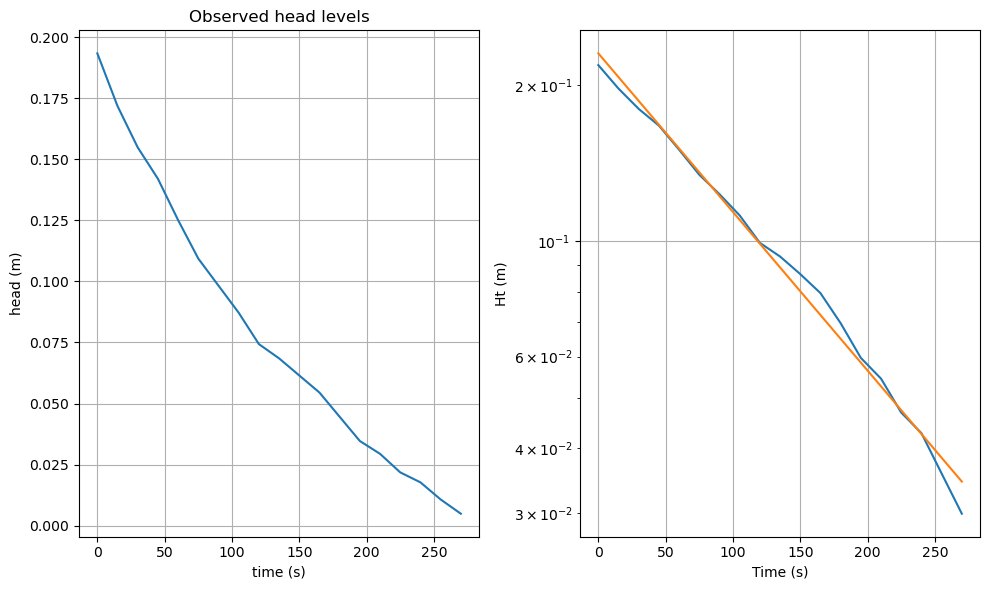

In [38]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
Patmo = 950

h, t = import_data(df, Patmo)
code = "Site2_Loc6_DF002_2"

plt.subplot(122)

r = 10/2/100 #radius of bore hole (m)
inv_aug(r, h, t, code)

Site2_Loc6_D002_3

In [39]:
df = pd.read_csv('Site2_loc6_DF002_3.csv', delimiter = "      ",  encoding='ISO-8859-1')
column_names = ['Datum & tijd', 'Druk (cmH2O)', "Temperatuur"]
df.columns = column_names

angle -0.27026468141261156


([0.00021082596475959354,
  7.94187408159181e-05,
  4.156487682289258e-06,
  0.0005253302762321572,
  0.00016269057837355112,
  0.0006492857016790994,
  0.00015881763238813855,
  8.071894359076811e-05,
  6.79133754945591e-05,
  0.00022070403566408213,
  0.00010997948908742785,
  5.863108117639902e-05,
  0.0007543736836055774,
  0.0003777380755548871,
  0.0003662255991882395,
  0.0002668476249818098,
  0.0004040185992833251,
  0.0002712300028347941],
 ['Site4_Loc1_BF375_1',
  'Site4_Loc1_BF375_2',
  'Site4_Loc1_DF002_1',
  'Site1_Loc4_AL116_1',
  'Site1_Loc4_AL116_2',
  'Site1_Loc4_DF200_2',
  'Site2_Loc1_AL116_1',
  'Site2_Loc1_AL116_2',
  'Site2_Loc1_AL116_3',
  'Site2_Loc1_DF002_1',
  'Site2_Loc1_DF002_2',
  'Site2_Loc1_DF002_3',
  'Site2_Loc6_AL116_1',
  'Site2_Loc6_AL116_2',
  'Site2_Loc6_AL116_3',
  'Site2_Loc6_DF002_1',
  'Site2_Loc6_DF002_2',
  'Site2_Loc6_DF002_3'])

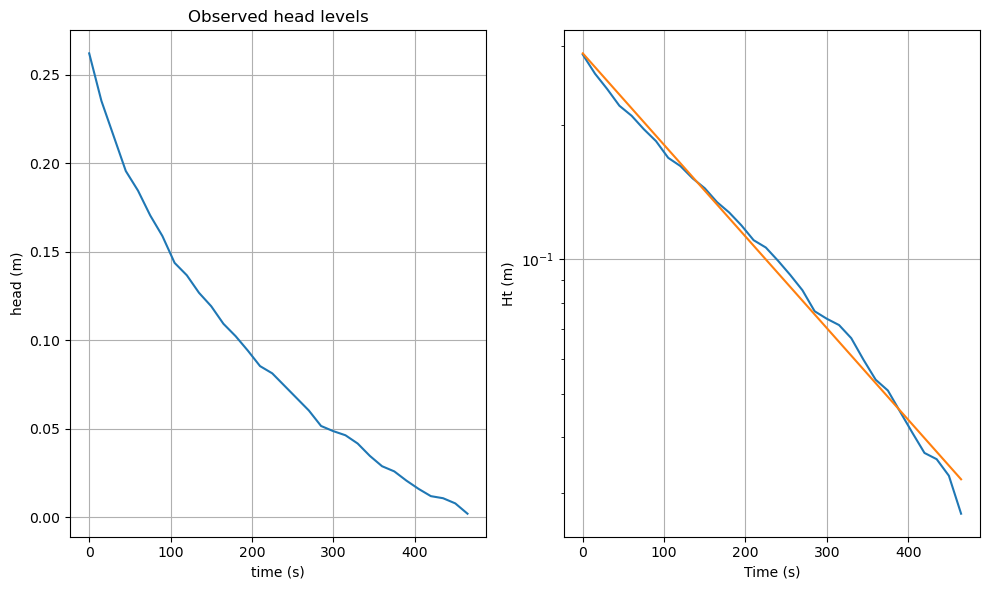

In [40]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
Patmo = 950

h, t = import_data(df, Patmo)
code = "Site2_Loc6_DF002_3"

plt.subplot(122)

r = 10/2/100 #radius of bore hole (m)
inv_aug(r, h, t, code)

Site3_Loc1_1

In [41]:
df = pd.read_csv('Site3_loc1_AL116_1.csv', delimiter = "      ",  encoding='ISO-8859-1')
column_names = ['Datum & tijd', 'Druk (cmH2O)', "Temperatuur"]
df.columns = column_names

angle -0.30875287735109924


([0.00021082596475959354,
  7.94187408159181e-05,
  4.156487682289258e-06,
  0.0005253302762321572,
  0.00016269057837355112,
  0.0006492857016790994,
  0.00015881763238813855,
  8.071894359076811e-05,
  6.79133754945591e-05,
  0.00022070403566408213,
  0.00010997948908742785,
  5.863108117639902e-05,
  0.0007543736836055774,
  0.0003777380755548871,
  0.0003662255991882395,
  0.0002668476249818098,
  0.0004040185992833251,
  0.0002712300028347941,
  0.0003098563706534051],
 ['Site4_Loc1_BF375_1',
  'Site4_Loc1_BF375_2',
  'Site4_Loc1_DF002_1',
  'Site1_Loc4_AL116_1',
  'Site1_Loc4_AL116_2',
  'Site1_Loc4_DF200_2',
  'Site2_Loc1_AL116_1',
  'Site2_Loc1_AL116_2',
  'Site2_Loc1_AL116_3',
  'Site2_Loc1_DF002_1',
  'Site2_Loc1_DF002_2',
  'Site2_Loc1_DF002_3',
  'Site2_Loc6_AL116_1',
  'Site2_Loc6_AL116_2',
  'Site2_Loc6_AL116_3',
  'Site2_Loc6_DF002_1',
  'Site2_Loc6_DF002_2',
  'Site2_Loc6_DF002_3',
  'Site3_Loc1_AL116_1'])

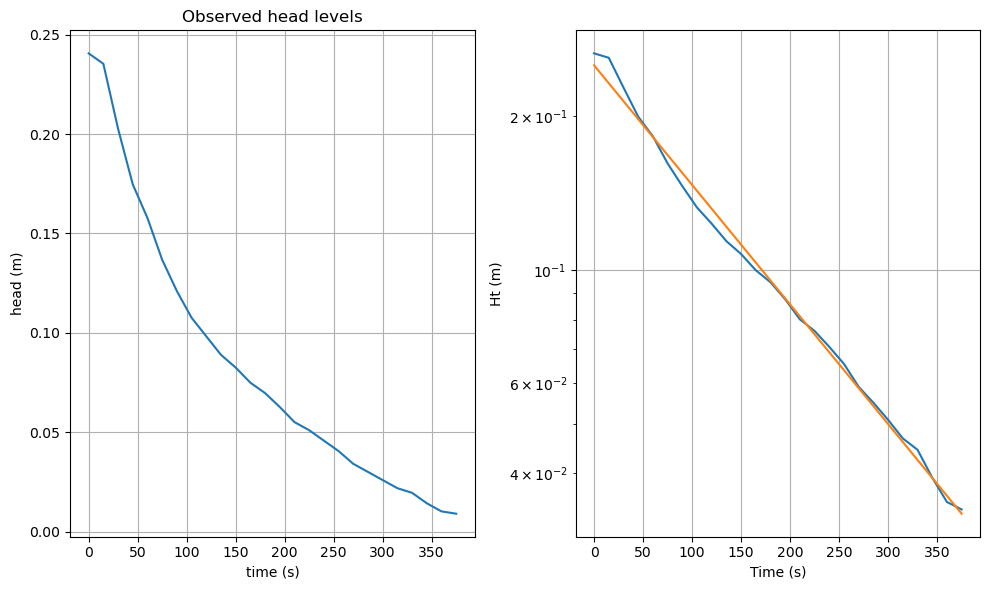

In [42]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
Patmo = 950

h, t = import_data(df, Patmo)
code = "Site3_Loc1_AL116_1"

plt.subplot(122)

r = 10/2/100 #radius of bore hole (m)
inv_aug(r, h, t, code)

In [43]:
df = pd.read_csv('Site3_loc1_AL116_2.csv', delimiter = "      ",  encoding='ISO-8859-1')
column_names = ['Datum & tijd', 'Druk (cmH2O)', "Temperatuur"]
df.columns = column_names

angle -0.2201677687420335


([0.00021082596475959354,
  7.94187408159181e-05,
  4.156487682289258e-06,
  0.0005253302762321572,
  0.00016269057837355112,
  0.0006492857016790994,
  0.00015881763238813855,
  8.071894359076811e-05,
  6.79133754945591e-05,
  0.00022070403566408213,
  0.00010997948908742785,
  5.863108117639902e-05,
  0.0007543736836055774,
  0.0003777380755548871,
  0.0003662255991882395,
  0.0002668476249818098,
  0.0004040185992833251,
  0.0002712300028347941,
  0.0003098563706534051,
  0.0002209536046338748],
 ['Site4_Loc1_BF375_1',
  'Site4_Loc1_BF375_2',
  'Site4_Loc1_DF002_1',
  'Site1_Loc4_AL116_1',
  'Site1_Loc4_AL116_2',
  'Site1_Loc4_DF200_2',
  'Site2_Loc1_AL116_1',
  'Site2_Loc1_AL116_2',
  'Site2_Loc1_AL116_3',
  'Site2_Loc1_DF002_1',
  'Site2_Loc1_DF002_2',
  'Site2_Loc1_DF002_3',
  'Site2_Loc6_AL116_1',
  'Site2_Loc6_AL116_2',
  'Site2_Loc6_AL116_3',
  'Site2_Loc6_DF002_1',
  'Site2_Loc6_DF002_2',
  'Site2_Loc6_DF002_3',
  'Site3_Loc1_AL116_1',
  'Site3_Loc1_AL116_2'])

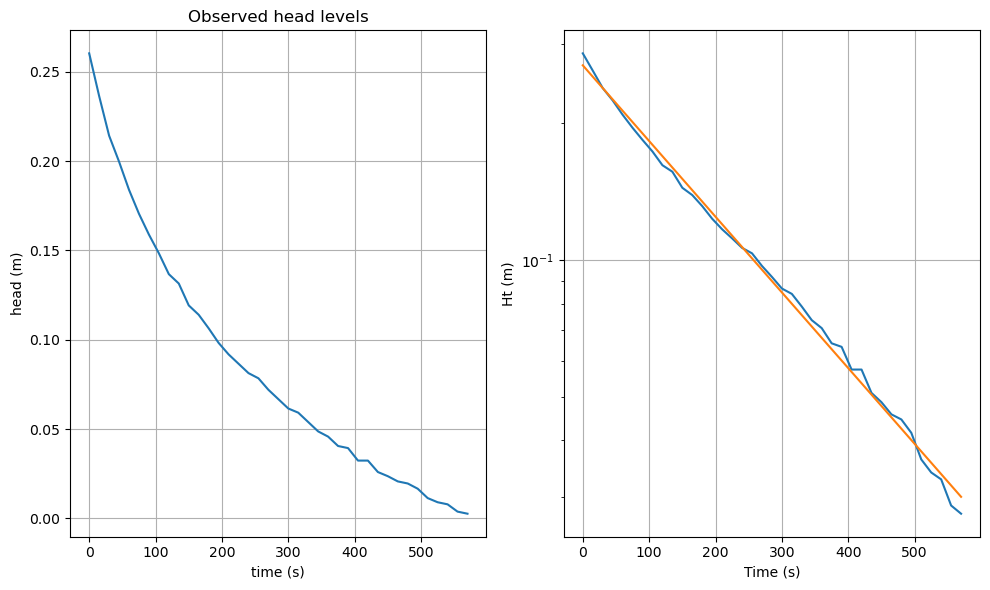

In [44]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
Patmo = 950

h, t = import_data(df, Patmo)
code = "Site3_Loc1_AL116_2"

plt.subplot(122)

r = 10/2/100 #radius of bore hole (m)
inv_aug(r, h, t, code)

In [45]:
df = pd.read_csv('Site3_loc1_AL116_2.csv', delimiter = "      ",  encoding='ISO-8859-1')
column_names = ['Datum & tijd', 'Druk (cmH2O)', "Temperatuur"]
df.columns = column_names

angle -0.2201677687420335


([0.00021082596475959354,
  7.94187408159181e-05,
  4.156487682289258e-06,
  0.0005253302762321572,
  0.00016269057837355112,
  0.0006492857016790994,
  0.00015881763238813855,
  8.071894359076811e-05,
  6.79133754945591e-05,
  0.00022070403566408213,
  0.00010997948908742785,
  5.863108117639902e-05,
  0.0007543736836055774,
  0.0003777380755548871,
  0.0003662255991882395,
  0.0002668476249818098,
  0.0004040185992833251,
  0.0002712300028347941,
  0.0003098563706534051,
  0.0002209536046338748,
  0.0002209536046338748],
 ['Site4_Loc1_BF375_1',
  'Site4_Loc1_BF375_2',
  'Site4_Loc1_DF002_1',
  'Site1_Loc4_AL116_1',
  'Site1_Loc4_AL116_2',
  'Site1_Loc4_DF200_2',
  'Site2_Loc1_AL116_1',
  'Site2_Loc1_AL116_2',
  'Site2_Loc1_AL116_3',
  'Site2_Loc1_DF002_1',
  'Site2_Loc1_DF002_2',
  'Site2_Loc1_DF002_3',
  'Site2_Loc6_AL116_1',
  'Site2_Loc6_AL116_2',
  'Site2_Loc6_AL116_3',
  'Site2_Loc6_DF002_1',
  'Site2_Loc6_DF002_2',
  'Site2_Loc6_DF002_3',
  'Site3_Loc1_AL116_1',
  'Site3_Loc1_A

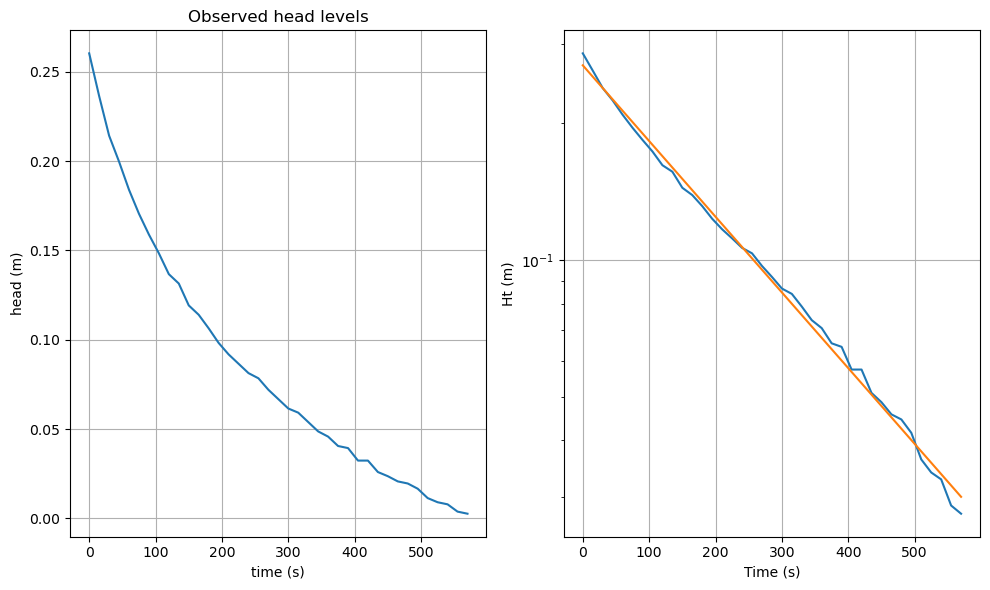

In [46]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
Patmo = 950

h, t = import_data(df, Patmo)
code = "Site3_Loc1_AL116_3"

plt.subplot(122)

r = 10/2/100 #radius of bore hole (m)
inv_aug(r, h, t, code)

In [47]:
df = pd.read_csv('Site3_loc1_DF002_1.csv', delimiter = "      ",  encoding='ISO-8859-1')
column_names = ['Datum & tijd', 'Druk (cmH2O)', "Temperatuur"]
df.columns = column_names

angle -0.1604080148641619


([0.00021082596475959354,
  7.94187408159181e-05,
  4.156487682289258e-06,
  0.0005253302762321572,
  0.00016269057837355112,
  0.0006492857016790994,
  0.00015881763238813855,
  8.071894359076811e-05,
  6.79133754945591e-05,
  0.00022070403566408213,
  0.00010997948908742785,
  5.863108117639902e-05,
  0.0007543736836055774,
  0.0003777380755548871,
  0.0003662255991882395,
  0.0002668476249818098,
  0.0004040185992833251,
  0.0002712300028347941,
  0.0003098563706534051,
  0.0002209536046338748,
  0.0002209536046338748,
  0.00016098018093246502],
 ['Site4_Loc1_BF375_1',
  'Site4_Loc1_BF375_2',
  'Site4_Loc1_DF002_1',
  'Site1_Loc4_AL116_1',
  'Site1_Loc4_AL116_2',
  'Site1_Loc4_DF200_2',
  'Site2_Loc1_AL116_1',
  'Site2_Loc1_AL116_2',
  'Site2_Loc1_AL116_3',
  'Site2_Loc1_DF002_1',
  'Site2_Loc1_DF002_2',
  'Site2_Loc1_DF002_3',
  'Site2_Loc6_AL116_1',
  'Site2_Loc6_AL116_2',
  'Site2_Loc6_AL116_3',
  'Site2_Loc6_DF002_1',
  'Site2_Loc6_DF002_2',
  'Site2_Loc6_DF002_3',
  'Site3_Loc1

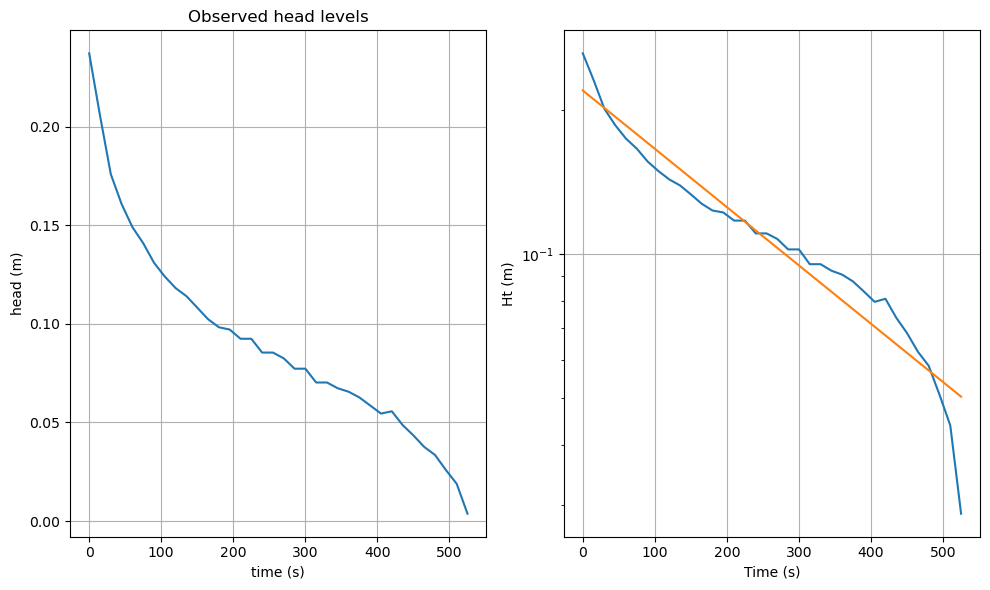

In [48]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
Patmo = 950

h, t = import_data(df, Patmo)
code = "Site3_Loc1_DF002_1"

plt.subplot(122)

r = 10/2/100 #radius of bore hole (m)
inv_aug(r, h, t, code)

In [49]:
df = pd.read_csv('Site3_loc1_DF002_2.csv', delimiter = "      ",  encoding='ISO-8859-1')
column_names = ['Datum & tijd', 'Druk (cmH2O)', "Temperatuur"]
df.columns = column_names

angle -0.07393601773255537


([0.00021082596475959354,
  7.94187408159181e-05,
  4.156487682289258e-06,
  0.0005253302762321572,
  0.00016269057837355112,
  0.0006492857016790994,
  0.00015881763238813855,
  8.071894359076811e-05,
  6.79133754945591e-05,
  0.00022070403566408213,
  0.00010997948908742785,
  5.863108117639902e-05,
  0.0007543736836055774,
  0.0003777380755548871,
  0.0003662255991882395,
  0.0002668476249818098,
  0.0004040185992833251,
  0.0002712300028347941,
  0.0003098563706534051,
  0.0002209536046338748,
  0.0002209536046338748,
  0.00016098018093246502,
  7.419959053741123e-05],
 ['Site4_Loc1_BF375_1',
  'Site4_Loc1_BF375_2',
  'Site4_Loc1_DF002_1',
  'Site1_Loc4_AL116_1',
  'Site1_Loc4_AL116_2',
  'Site1_Loc4_DF200_2',
  'Site2_Loc1_AL116_1',
  'Site2_Loc1_AL116_2',
  'Site2_Loc1_AL116_3',
  'Site2_Loc1_DF002_1',
  'Site2_Loc1_DF002_2',
  'Site2_Loc1_DF002_3',
  'Site2_Loc6_AL116_1',
  'Site2_Loc6_AL116_2',
  'Site2_Loc6_AL116_3',
  'Site2_Loc6_DF002_1',
  'Site2_Loc6_DF002_2',
  'Site2_Loc

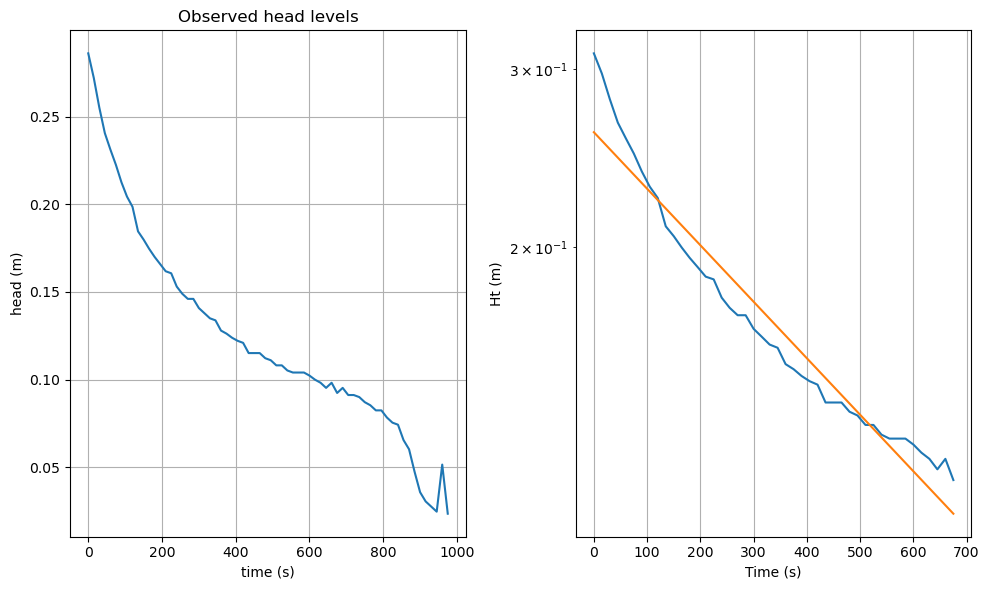

In [50]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
Patmo = 950

h, t = import_data(df, Patmo)
code = "Site3_Loc1_DF002_2"

plt.subplot(122)

r = 10/2/100 #radius of bore hole (m)
inv_aug(r, h[:-20], t[:-20], code)

In [51]:
df = pd.read_csv('Site3_loc1_DF002_3.csv', delimiter = "      ",  encoding='ISO-8859-1')
column_names = ['Datum & tijd', 'Druk (cmH2O)', "Temperatuur"]
df.columns = column_names

angle -0.06175481365993642


([0.00021082596475959354,
  7.94187408159181e-05,
  4.156487682289258e-06,
  0.0005253302762321572,
  0.00016269057837355112,
  0.0006492857016790994,
  0.00015881763238813855,
  8.071894359076811e-05,
  6.79133754945591e-05,
  0.00022070403566408213,
  0.00010997948908742785,
  5.863108117639902e-05,
  0.0007543736836055774,
  0.0003777380755548871,
  0.0003662255991882395,
  0.0002668476249818098,
  0.0004040185992833251,
  0.0002712300028347941,
  0.0003098563706534051,
  0.0002209536046338748,
  0.0002209536046338748,
  0.00016098018093246502,
  7.419959053741123e-05,
  6.197495156988425e-05],
 ['Site4_Loc1_BF375_1',
  'Site4_Loc1_BF375_2',
  'Site4_Loc1_DF002_1',
  'Site1_Loc4_AL116_1',
  'Site1_Loc4_AL116_2',
  'Site1_Loc4_DF200_2',
  'Site2_Loc1_AL116_1',
  'Site2_Loc1_AL116_2',
  'Site2_Loc1_AL116_3',
  'Site2_Loc1_DF002_1',
  'Site2_Loc1_DF002_2',
  'Site2_Loc1_DF002_3',
  'Site2_Loc6_AL116_1',
  'Site2_Loc6_AL116_2',
  'Site2_Loc6_AL116_3',
  'Site2_Loc6_DF002_1',
  'Site2_Lo

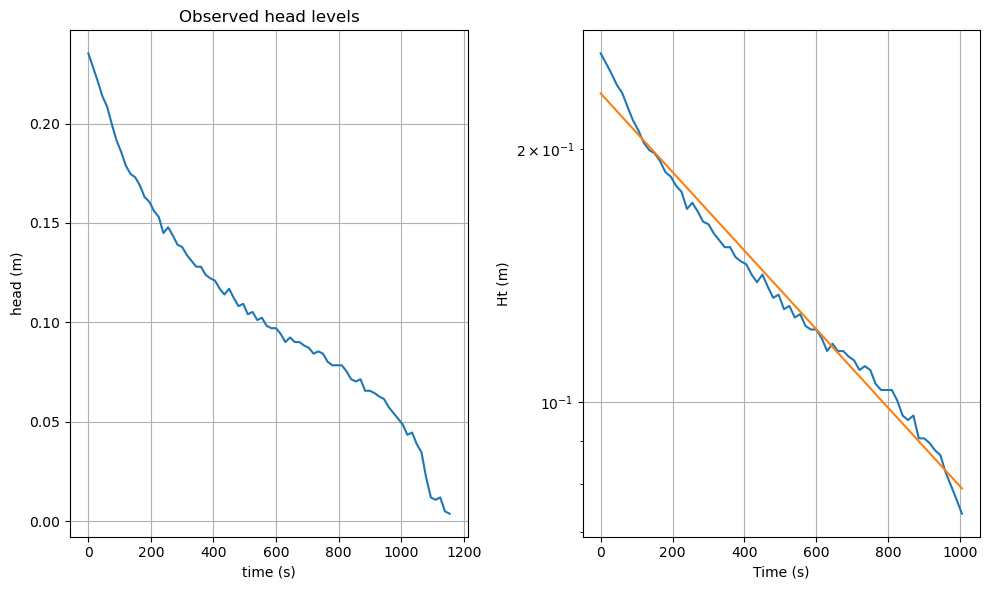

In [52]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
Patmo = 950

h, t = import_data(df, Patmo)
code = "Site3_Loc1_DF002_3"

plt.subplot(122)

r = 10/2/100 #radius of bore hole (m)
inv_aug(r, h[:-10], t[:-10], code)

**SUMMARY**

In [53]:
cols = 1
rows = len(code_list)

matrix = [['' for _ in range(cols)] for _ in range(rows)]

for i in range(rows):
    for j in range(cols):
        matrix[i][j] = f"{code_list[i]}, {mean_ksat[i]} m/s."

In [54]:
matrix

[['Site4_Loc1_BF375_1, 0.00021082596475959354 m/s.'],
 ['Site4_Loc1_BF375_2, 7.94187408159181e-05 m/s.'],
 ['Site4_Loc1_DF002_1, 4.156487682289258e-06 m/s.'],
 ['Site1_Loc4_AL116_1, 0.0005253302762321572 m/s.'],
 ['Site1_Loc4_AL116_2, 0.00016269057837355112 m/s.'],
 ['Site1_Loc4_DF200_2, 0.0006492857016790994 m/s.'],
 ['Site2_Loc1_AL116_1, 0.00015881763238813855 m/s.'],
 ['Site2_Loc1_AL116_2, 8.071894359076811e-05 m/s.'],
 ['Site2_Loc1_AL116_3, 6.79133754945591e-05 m/s.'],
 ['Site2_Loc1_DF002_1, 0.00022070403566408213 m/s.'],
 ['Site2_Loc1_DF002_2, 0.00010997948908742785 m/s.'],
 ['Site2_Loc1_DF002_3, 5.863108117639902e-05 m/s.'],
 ['Site2_Loc6_AL116_1, 0.0007543736836055774 m/s.'],
 ['Site2_Loc6_AL116_2, 0.0003777380755548871 m/s.'],
 ['Site2_Loc6_AL116_3, 0.0003662255991882395 m/s.'],
 ['Site2_Loc6_DF002_1, 0.0002668476249818098 m/s.'],
 ['Site2_Loc6_DF002_2, 0.0004040185992833251 m/s.'],
 ['Site2_Loc6_DF002_3, 0.0002712300028347941 m/s.'],
 ['Site3_Loc1_AL116_1, 0.000309856370653405

In [55]:
S4_L1 = mean_ksat[0:2]
S2_L1 = mean_ksat[7:13]
S2_L6 = mean_ksat[14:20]
S1_L4 = mean_ksat[3:6]
S3_L1 = mean_ksat[20:26]

In [56]:
data = [S1_L4, S2_L1, S2_L6, S3_L1, S4_L1]
loc = ['S1_L4', 'S2_L1', 'S2_L6', 'S3_L1', 'S4_L1']

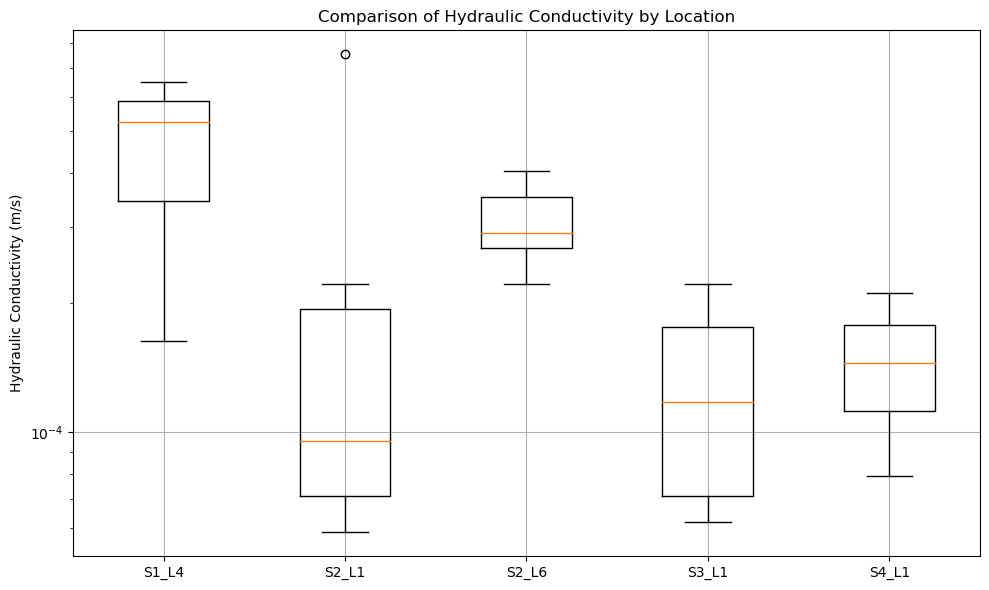

In [57]:
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=loc)
plt.ylabel('Hydraulic Conductivity (m/s)')
plt.yscale("log")
plt.title('Comparison of Hydraulic Conductivity by Location')
plt.savefig("comparison", dpi = 300)
plt.show()

In [58]:
cl = S4_L1 + S2_L1 + S3_L1
nc = S2_L6 + S1_L4
data = [cl, nc]
labels = ["cleared", "non cleared"]

In [65]:
mean_cl = np.mean(cl) *1000
mean_nc = np.mean(nc) *1000 

print(mean_cl)
print(mean_nc)



1.7505613682233006
3.529375953178062


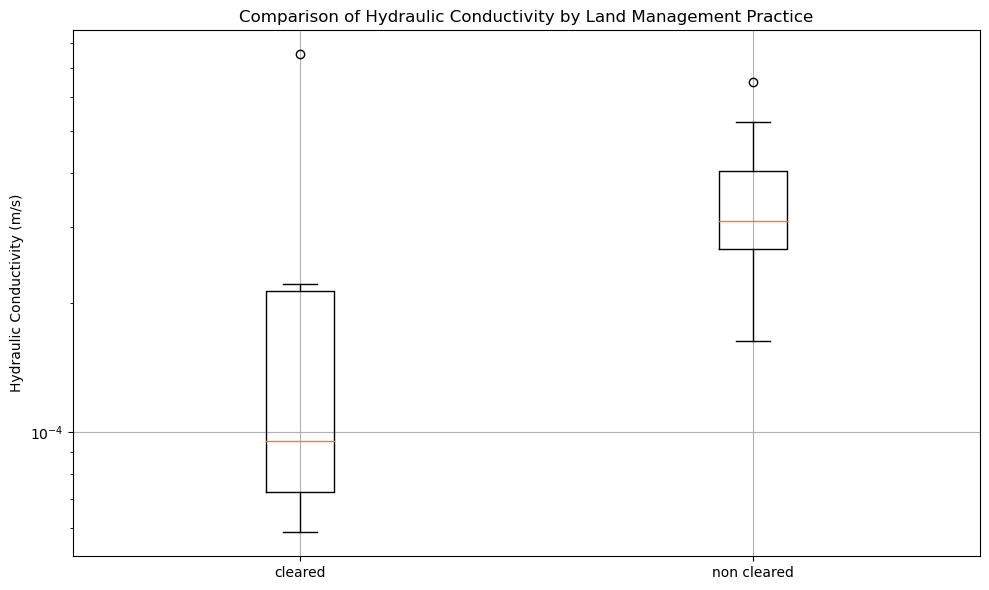

In [60]:
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels = labels)
plt.ylabel('Hydraulic Conductivity (m/s)')
plt.yscale("log")
plt.title('Comparison of Hydraulic Conductivity by Land Management Practice')
plt.savefig("comparison", dpi = 300)
plt.show()

In [61]:
print("try1")

try1
